# 📊 Generate AQI Visualizations

This notebook generates 5 publication-ready plots from the AQI analysis and saves them to `images/plots/`.

**Run each cell in order to:**
1. Load and prepare data
2. Engineer features
3. Generate 5 high-resolution plots

**Output**: 5 PNG files (150 DPI) saved to `images/plots/`

## Step 1: Setup

In [ ]:
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore

file_path = 'data/raw/delhi_air_quality_clean.csv'
df = pd.read_csv(file_path)
print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(df.head())

✅ Libraries imported successfully!


## Step 2: Load Data

In [ ]:
df = pd.read_csv('data/raw/delhi_air_quality_clean.csv')
print(f"Data loaded: {df.shape}")
df.head()

Loading data...
✅ Data loaded: (1461, 12)

Columns: ['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']

Data preview:


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


## Step 3: Prepare Data

In [ ]:
POLLUTANTS = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']

# Create DateTime
df['DateTime'] = pd.to_datetime(df[['Year', 'Month', 'Date']].rename(
    columns={'Date': 'day', 'Month': 'month', 'Year': 'year'}))

# Create Season
def get_season(m):
    if m in [12, 1, 2]: return 'Winter'
    elif m in [3, 4, 5]: return 'Summer'
    elif m in [6, 7, 8, 9]: return 'Monsoon'
    else: return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

# Create AQI Category
def get_category(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Satisfactory'
    elif aqi <= 200: return 'Moderate'
    elif aqi <= 300: return 'Poor'
    elif aqi <= 400: return 'Very Poor'
    else: return 'Severe'

df['AQI_Category'] = df['AQI'].apply(get_category)
print("✅ Data prepared!")

✅ Features engineered successfully!

New shape: (1461, 17)

Engineered columns: DateTime, Season, AQI_Category, IsWeekend, AvgPollution


## Plot 1: AQI Distribution

Generating Plot 1: AQI Distribution...

✅ Saved: images/plots/01_aqi_distribution.png


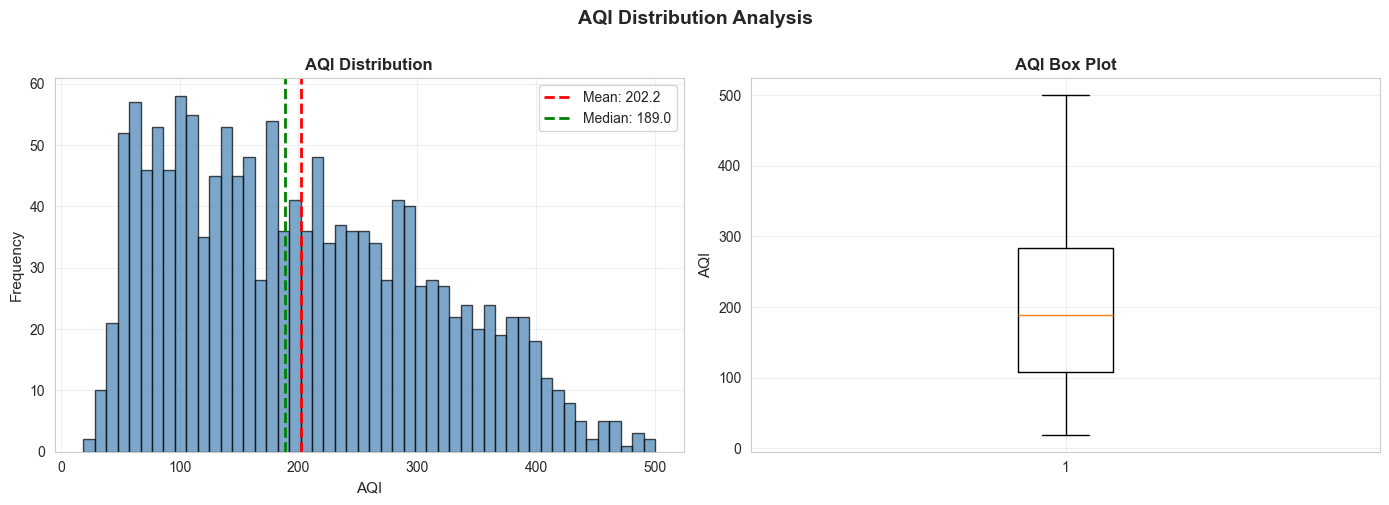

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axes[0].hist(df['AQI'], bins=40, color='steelblue', alpha=0.7)
axes[0].axvline(df['AQI'].mean(), color='red', linestyle='--', label=f'Mean: {df["AQI"].mean():.0f}')
axes[0].set_xlabel('AQI')
axes[0].set_ylabel('Frequency')
axes[0].set_title('AQI Distribution')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['AQI'])
axes[1].set_ylabel('AQI')
axes[1].set_title('AQI Box Plot')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('images/plots/01_aqi_distribution.png', bbox_inches='tight')
print("✅ Plot 1 saved")
plt.show()

## Plot 2: Category Breakdown

Generating Plot 2: AQI Category Distribution...

✅ Saved: images/plots/02_category_breakdown.png


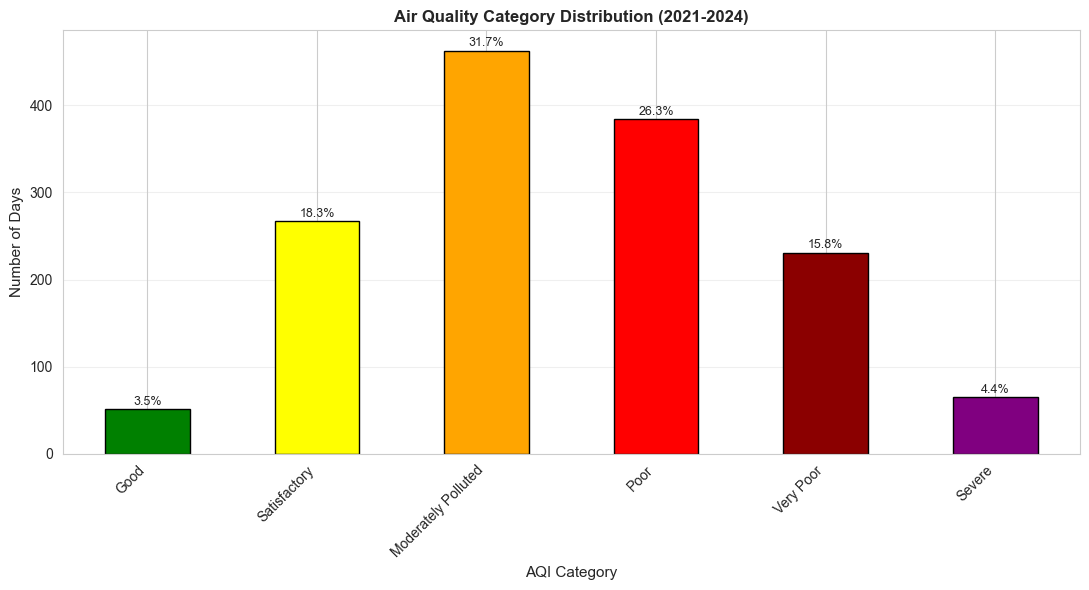

In [ ]:
cats = df['AQI_Category'].value_counts().sort_index()
colors = {'Good': 'green', 'Satisfactory': 'yellow', 'Moderate': 'orange', 
          'Poor': 'red', 'Very Poor': 'darkred', 'Severe': 'purple'}

plt.figure(figsize=(10, 5))
bars = plt.bar(cats.index, cats.values, color=[colors.get(c, 'gray') for c in cats.index], edgecolor='black')
plt.xlabel('AQI Category')
plt.ylabel('Days')
plt.title('Air Quality Category Distribution')
plt.xticks(rotation=45)

# Add percentage
for bar, count in zip(bars, cats.values):
    pct = (count / len(df)) * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{pct:.0f}%', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('images/plots/02_category_breakdown.png', bbox_inches='tight')
print("✅ Plot 2 saved")
plt.show()

## Plot 3: Correlation Heatmap

Generating Plot 3: Correlation Heatmap...

✅ Saved: images/plots/03_correlation_heatmap.png


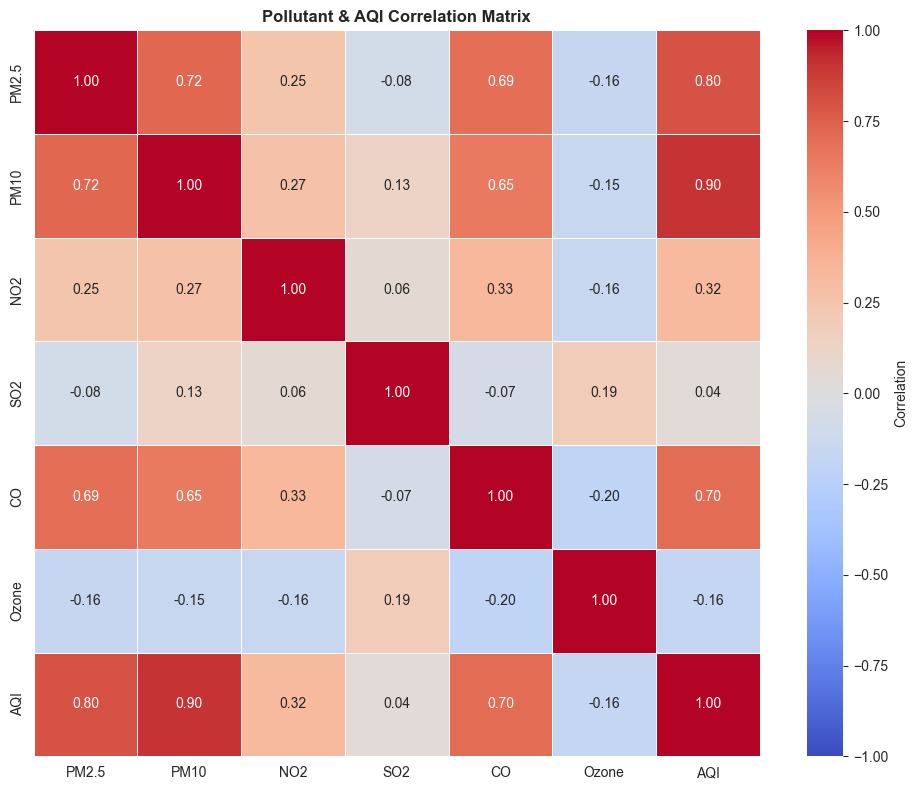

In [ ]:
corr = df[POLLUTANTS + ['AQI']].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, cbar_kws={'label': 'Correlation'})
plt.title('Pollutant & AQI Correlation')
plt.tight_layout()
plt.savefig('images/plots/03_correlation_heatmap.png', bbox_inches='tight')
print("✅ Plot 3 saved")
plt.show()

## Plot 4: Seasonal Analysis

Generating Plot 4: Seasonal Analysis...

✅ Saved: images/plots/04_seasonal_analysis.png


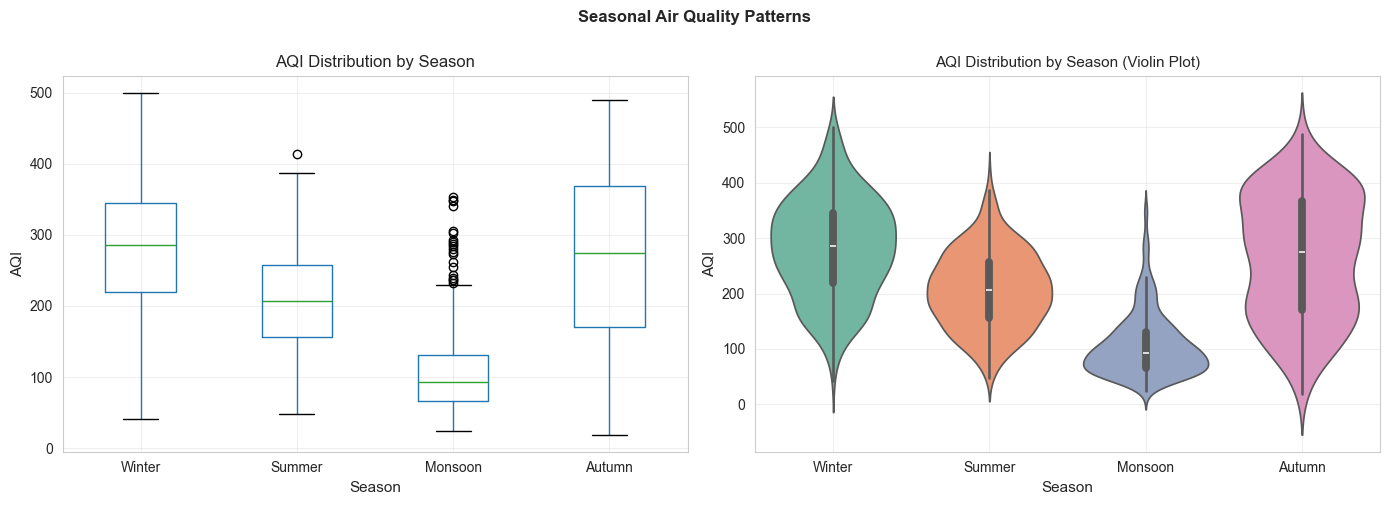

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Box plot by season
season_order = ['Winter', 'Summer', 'Monsoon', 'Autumn']
df_season = df.copy()
df_season['Season'] = pd.Categorical(df_season['Season'], categories=season_order, ordered=True)

sns.boxplot(data=df_season, x='Season', y='AQI', ax=axes[0], order=season_order)
axes[0].set_title('AQI by Season')
axes[0].grid(alpha=0.3)

# Violin plot
sns.violinplot(data=df_season, x='Season', y='AQI', ax=axes[1], palette='Set2', order=season_order)
axes[1].set_title('AQI Distribution (Violin)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('images/plots/04_seasonal_analysis.png', bbox_inches='tight')
print("✅ Plot 4 saved")
plt.show()

## Plot 5: Time Series Trend

Generating Plot 5: Time Series Trend...

✅ Saved: images/plots/05_timeseries_trend.png


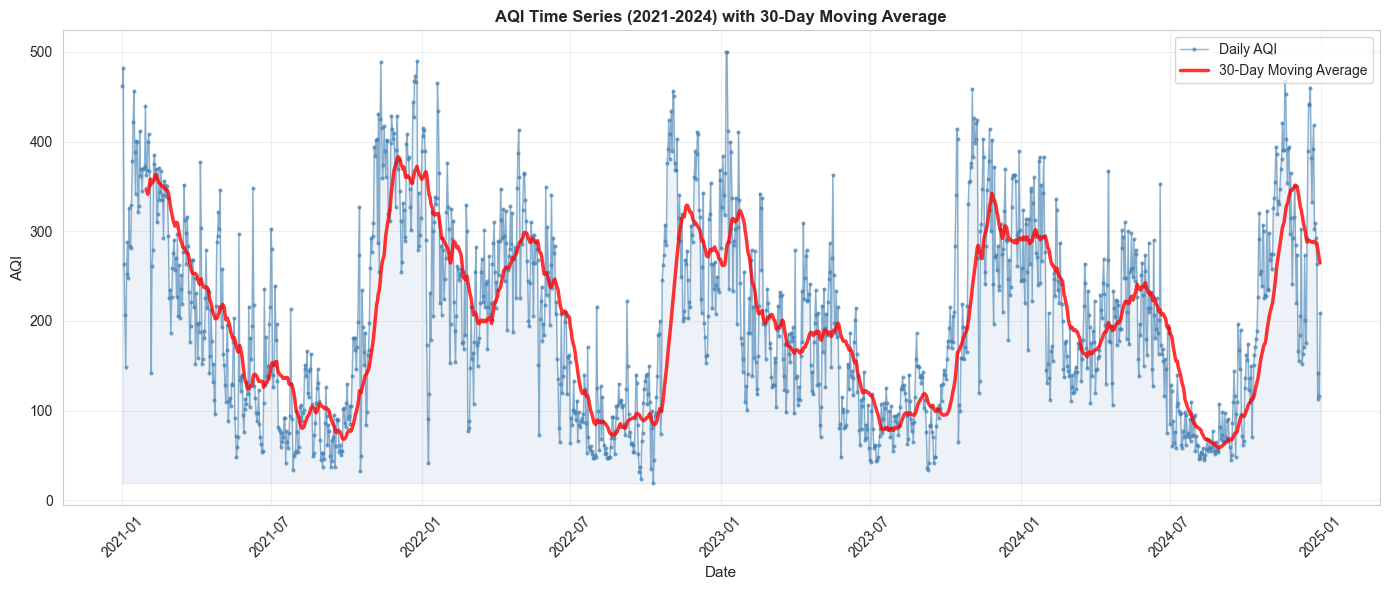

In [ ]:
df_sort = df.sort_values('DateTime')

plt.figure(figsize=(12, 5))
plt.plot(df_sort['DateTime'], df_sort['AQI'], alpha=0.5, label='Daily AQI')

# 30-day moving average
ma = df_sort['AQI'].rolling(30).mean()
plt.plot(df_sort['DateTime'], ma, color='red', linewidth=2, label='30-Day MA')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Time Series (2021-2024)')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/plots/05_timeseries_trend.png', bbox_inches='tight')
print("✅ Plot 5 saved")
plt.show()

## Done! ✅

In [ ]:
print("="*50)
print("✅ All plots generated successfully!")
print("="*50)
print("\n📊 Saved plots:")
print("   1. images/plots/01_aqi_distribution.png")
print("   2. images/plots/02_category_breakdown.png")
print("   3. images/plots/03_correlation_heatmap.png")
print("   4. images/plots/04_seasonal_analysis.png")
print("   5. images/plots/05_timeseries_trend.png")
print("\n📁 Check images/plots/ folder for all visualizations!")
print("="*50)


✅ All visualizations generated successfully!

📁 Output Location: images/plots/

📊 Generated Plots:
   1. 01_aqi_distribution.png
   2. 02_category_breakdown.png
   3. 03_correlation_heatmap.png
   4. 04_seasonal_analysis.png
   5. 05_timeseries_trend.png

💾 All plots saved at 150 DPI (publication quality)
